## Solving the 1D Schrödinger Equation Using the Numerov Method

This Jupyter Notebook demonstrates how to solve the one-dimensional Schrödinger equation numerically using the Numerov method. The task involves finding eigenvalues and wavefunctions for a potential well \( V(x) \). 

We will:
1. Define the constants and the potential function.
2. Implement the Numerov method for numerical integration.
3. Match the wavefunctions from the left and right at a turning point.
4. Use root-finding to compute the eigenvalues numerically.
5. Plot the potential and corresponding wavefunctions.

### One-Dimentional equation is given by,
$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
$$

where:
- $ m $ is the mass of the particle,
- $ \hbar $ is the reduced Planck's constant,
- $ E $ is the energy level,
- $ \psi(x) $ is the wavefunction, and
- $ V(x) $ is the potential.

We can rewrite the Schrodinger equation in the form of \(\psi''(x)\):

$$\psi''(x) + \frac{2m}{\hbar^2} \left[ E - V(x) \right] \psi(x) = 0$$

This is in the same form as the linear shooting method (also known as the Sturm-Liouville problem) with:

$$p(x) = 1, \quad q(x) = \frac{2m}{\hbar^2} \left[ E - V(x) \right], \quad r(x) = 0$$

We start by importing all the required libraries. In this code, we import two main libraries which are NumPy and matplotlib.pyplot.NumPy provides tools for working with arrays and performing mathematical operations meanwhile matplotlib.pyplot is use for creating visualizations like plots, graphs, and charts.


 ### Import Necessary Libraries

We start by importing the required Python libraries:
- `numpy`: For numerical computations.
- `matplotlib`: For plotting.
- `scipy.optimize`: For root-finding to compute eigenvalues.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

 ### Define Constants and Parameters

Here, we define:
- Constants $ \hbar, m, \alpha, \lambda $.
- The range of $ x $ values and the step size $ h $ for numerical computation.


In [18]:
h_bar = 1   # Reduced Planck constant
mass = 1    # Particle mass
alpha_param = 1
lambda_param = 4

# Define the range and step for x
x_min, x_max, step = -10, 10, 0.05
x_values = np.arange(x_min, x_max + step, step)


 ### Define the Potential Function

The potential function $ V(x) $ is defined based on the given formula:

$$V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda - 1) \left( \frac{1}{2} - \frac{1}{\cosh^2(\alpha x)} \right)$$


In [19]:
def potential(x):
    scaling_factor = (h_bar**2 / (2 * mass)) * alpha_param**2 * lambda_param * (lambda_param - 1)
    return scaling_factor * (0.5 - 1 / (np.cosh(alpha_param * x)**2))


 ### Plot the Potential Function

We plot the potential $ V(x) $ over the range of $ x $.


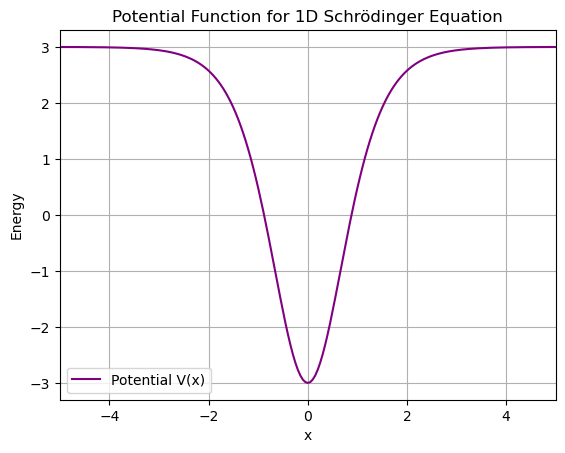

In [20]:
plt.plot(x_values, potential(x_values), color="purple", label="Potential V(x)")
plt.xlabel("x")
plt.ylabel("Energy")
plt.xlim(-5, 5)
plt.title("Potential Function for 1D Schrödinger Equation")
plt.grid()
plt.legend()
plt.show()


 ### Implement the Numerov Method

The Numerov method is a numerical integration technique used to solve second-order differential equations like the Schrödinger equation. 

Steps:
1. Initialize the wavefunction $ \psi(x) $ with two starting values.
2. Use the Numerov recursion formula to calculate $ \psi(x) $ for all $ x $.
3. Return the resulting wavefunction.

Numerov Recuurence Relation


$$\psi_{i+1} = \frac{2 \left( 1 - \frac{5}{12} h^2 q_i \right) \psi_i - \left( 1 + \frac{h^2}{12} q_{i-1} \right) \psi_{i-1}}{1 + \frac{h^2}{12} q_{i+1}}$$

where:
- $h$ is step size, given by $ h= x_{i+1}-x_i $
- $q_i$ is the coefficient $q(x)$ evaluated at the $i-th$ grid point
- $\psi_i$ is wavefunction value at the $i-th$ grid point



In [21]:
def numerov_method(psi_start, psi_next, energy, x_vals, step_size):
    num_points = len(x_vals)
    psi_vals = np.zeros(num_points)
    psi_vals[0], psi_vals[1] = psi_start, psi_next

    # Define the effective potential function
    effective_potential = lambda x: 2 * mass / h_bar**2 * (energy - potential(x))

    for i in range(1, num_points - 1):
        k_0 = effective_potential(x_vals[i - 1])
        k_1 = effective_potential(x_vals[i])
        k_2 = effective_potential(x_vals[i + 1])

        psi_vals[i + 1] = (
            2 * (1 - 5 * step_size**2 * k_1 / 12) * psi_vals[i]
            - (1 + step_size**2 * k_0 / 12) * psi_vals[i - 1]
        ) / (1 + step_size**2 * k_2 / 12)

    return psi_vals


## The Eigenvalue Problem

For eigenvalue problem, the particle is confined by the potential well $ V(x) $ so that $ \psi(x)  \rightarrow  \infty$. To solve this eigenvalue problem, we can integrate the equation with Numerov algorithm either from left to right or right to left of the potential region.

Since the wavefunction goes to zero as $\lvert x \rvert \rightarrow \infty$, the integration from one side to another requires integrating from exponentially increasing region to an oscillatory region and then into exponentially decreasing region.

To solve and reduced error when integrating the region, we need to integrate/obtain the solutions from both sides and match them in well region. Matching is done when the energy is equal to potential energy, i.e $x_l$ and $x_r$ 
. The so-called matching here is to adjust the trial eigenvalue until the solution integrated from the right $\psi_r(x)$, and the solution integrated from the left $\psi_l(x)$ satisfy the boundary conditions at one of the turning points.

Choosing the turning point, the continuity conditions are:
$$\psi_l(x_r) = \psi_r(x_r)$$
$$\psi_l'(x_r) = \psi_r'(x_r)$$

If we combine these two conditions, we have 
$$\frac{\psi_l'(x_r)}{\psi_r(x_r)} = \frac{\psi_r'(x_r)}{\psi_r(x_r)}$$

Using the three point formula for the first-order, we have:
$$f(E) = \frac{[\psi_l(x_r+h)-\psi_l(x_r-h)]-[\psi_r(x_r+h)-\psi_r(x_r-h)]}{2h\psi(x_r)}$$
The function is can be solved using root search scheme

### Define the Matching Condition

The wavefunctions are matched at a turning point where $ \psi(x) $ and its derivative are continuous. 
We calculate the difference between the left and right wavefunctions at the midpoint.


In [22]:
def compute_matching_condition(energy, x_vals, step_size):
    psi_left = numerov_method(0.0, 1e-5, energy, x_vals, step_size)
    psi_right = numerov_method(0.0, 1e-5, energy, x_vals[::-1], step_size)[::-1]
    mid_index = len(x_vals) // 2
    left_ratio = (psi_left[mid_index + 1] - psi_left[mid_index - 1]) / (2 * step_size * psi_left[mid_index])
    right_ratio = (psi_right[mid_index + 1] - psi_right[mid_index - 1]) / (2 * step_size * psi_right[mid_index])
    return left_ratio - right_ratio


## Eigenvalues Function

The eigenvalues function is given by:
$$E_n= \frac{\hbar^2}{2m} \alpha^2 [\frac{\lambda(\lambda-1)}{2}-(\lambda-1-n)^2]$$
for $n=0,1,2,...$ with the values of $\alpha =1, \lambda=4$. For convinience, we shall use $\hbar=m=1$. We also compute the first three value of eigenvalue. We also plot the eigenvalue with the potential

### Find Eigenvalues Using Root-Finding

We use the `scipy.optimize.root_scalar` function to find the energy levels \( E \) where the matching condition is satisfied.


In [23]:
def determine_eigenvalues(x_vals, step_size, levels=3):
    eigenvalues = []
    energy_start, energy_end, energy_increment = -2, 0, 2

    for level in range(levels):
        energy_range = np.linspace(energy_start, energy_end, 100)
        for e1, e2 in zip(energy_range[:-1], energy_range[1:]):
            if compute_matching_condition(e1, x_vals, step_size) * compute_matching_condition(e2, x_vals, step_size) < 0:
                result = root_scalar(compute_matching_condition, args=(x_vals, step_size), bracket=[e1, e2], method='brentq')
                eigenvalues.append(result.root)
                break
        energy_start += energy_increment
        energy_end += energy_increment

    return eigenvalues


### Compute and Display Eigenvalues

We compute the eigenvalues and display the results.


In [24]:
num_levels = 3
eigen_vals = determine_eigenvalues(x_values, step, levels=num_levels)
print("Computed Eigenvalues:")
for idx, eigen in enumerate(eigen_vals):
    print(f"Level {idx}: E = {eigen:.6f}")


Computed Eigenvalues:
Level 0: E = -1.500001
Level 1: E = 0.999998
Level 2: E = 2.499998


### Plot Wavefunctions

We plot the potential function and overlay the normalized wavefunctions for each energy level.


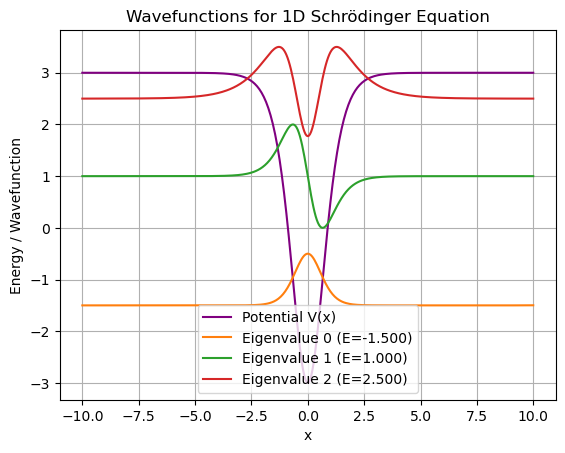

In [25]:
plt.plot(x_values, potential(x_values), label="Potential V(x)", color='purple')
for idx, eigen in enumerate(eigen_vals):
    psi_wave = numerov_method(0.0, 1e-5, eigen, x_values, step)
    normalized_wave = psi_wave / np.max(np.abs(psi_wave)) + eigen
    plt.plot(x_values, normalized_wave, label=f"Eigenvalue {idx} (E={eigen:.3f})", color=f"C{idx + 1}")
plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.title("Wavefunctions for 1D Schrödinger Equation")
plt.legend()
plt.grid()
plt.show()
